In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import seaborn as sns; sns.set()

# 1. Problem understanding 

# 2. Data Extraction

## Download and Prepare PHM08 dataset

In [3]:
index_names = ['ID', 'Cycle']
setting_names = ['OptSet1', 'OptSet2', 'OptSet3']
sensor_names = ['s_{}'.format(i) for i in range(0,23)] 
col_names = index_names + setting_names + sensor_names

train = pd.read_csv('/Users/philippebeliveau/Library/Mobile Documents/com~apple~CloudDocs/I2A2/Challenge Engine Airplane/Challenge_Data/train.txt', 
                      sep=' ', header = None, names=col_names)



test = pd.read_csv('/Users/philippebeliveau/Library/Mobile Documents/com~apple~CloudDocs/I2A2/Challenge Engine Airplane/Challenge_Data/test.txt', 
                      sep=' ', header = None, names=col_names)


In [4]:
# Let's have a look at engine number 1
train[train['ID'] == 1]

ID  Cycle  OptSet1  OptSet2  OptSet3     s_0     s_1      s_2      s_3  \
0     1      1  10.0047   0.2501     20.0  489.05  604.13  1499.45  1309.95   
1     1      2   0.0015   0.0003    100.0  518.67  642.13  1584.55  1403.96   
2     1      3  34.9986   0.8401     60.0  449.44  555.42  1368.17  1122.49   
3     1      4  20.0031   0.7005      0.0  491.19  607.03  1488.44  1249.18   
4     1      5  42.0041   0.8405     40.0  445.00  549.52  1354.48  1124.32   
..   ..    ...      ...      ...      ...     ...     ...      ...      ...   
218   1    219  35.0073   0.8400     60.0  449.44  556.39  1381.50  1149.74   
219   1    220  35.0027   0.8400     60.0  449.44  556.65  1375.43  1149.45   
220   1    221   0.0008   0.0000    100.0  518.67  643.88  1593.26  1425.82   
221   1    222  20.0003   0.7001      0.0  491.19  608.00  1494.99  1270.18   
222   1    223  34.9992   0.8400     60.0  449.44  556.60  1385.96  1150.47   

       s_4  ...     s_13    s_14  s_15  s_16  s_17   s_18   s_19     s_20  \
0    10.52  ...  8120.83  8.6216  0.03   368  2319  100.0  28.58  17.1735   
1    14.62  ...  8132.87  8.3907  0.03   391  2388  100.0  38.99  23.3619   
2     5.48  ...  8063.84  9.3557  0.02   334  2223  100.0  14.83   8.8555   
3     9.35  ...  8052.30  9.2231  0.02   364  2324  100.0  24.42  14.7832   
4     3.91  ...  8083.67  9.2986  0.02   330  2212  100.0  10.99   6.4025   
..     ...  ...      ...     ...   ...   ...   ...    ...    ...      ...   
218   5.48  ...  8068.10  9.4265  0.02   337  2223  100.0  14.82   8.7966   
219   5.48  ...  8068.06  9.4148  0.02   338  2223  100.0  14.75   8.8290   
220  14.62  ...  8139.03  8.5363  0.03   394  2388  100.0  38.67  23.0218   
221   9.35  ...  8065.53  9.2846  0.03   369  2324  100.0  24.28  14.5645   
222   5.48  ...  8070.86  9.4489  0.02   337  2223  100.0  14.70   8.6695   

     s_21  s_22  
0     NaN   NaN  
1     NaN   NaN  
2     NaN   NaN  
3     NaN   NaN  
4     NaN   NaN  
..    ...   ...  
218   NaN   NaN  
219   NaN   NaN  
220   NaN   NaN  
221   NaN   NaN  
222   NaN   NaN  

[223 rows x 28 columns]

# 2. Data cleaning

In [5]:
# - Casting 
# - Define the standards 
# - Drop colums 
# - Missing Values 
# - Prepare for EDA 

## Compute outcom variable RUL 

In [6]:
max_cycle_train = train.groupby(['ID'], sort=False)['Cycle'].max().reset_index().rename(columns={'Cycle': 'Max_cycles'})
max_cycle_train.head()

max_cycle_test = test.groupby(['ID'], sort=False)['Cycle'].max().reset_index().rename(columns={'Cycle': 'Max_cycles'})
max_cycle_test.head()

ID  Max_cycles
0   1          54
1   2         157
2   3         116
3   4          74
4   5         218

In [7]:
# Merge 
train = pd.merge(train, max_cycle_train, how='inner', on='ID')
train['RUL']=train['Max_cycles']-train['Cycle']

test = pd.merge(test, max_cycle_test, how='inner', on='ID')
test['RUL']=test['Max_cycles']-test['Cycle']
test

ID  Cycle  OptSet1  OptSet2  OptSet3     s_0     s_1      s_2  \
0        1      1   0.0016   0.0002    100.0  518.67  642.88  1587.21   
1        1      2  24.9993   0.6215     80.0  462.54  536.45  1262.64   
2        1      3   0.0004   0.0000    100.0  518.67  642.65  1589.75   
3        1      4  10.0034   0.2500     20.0  489.05  604.44  1499.93   
4        1      5   0.0024   0.0011    100.0  518.67  642.74  1585.47   
...    ...    ...      ...      ...      ...     ...     ...      ...   
29815  218     86  35.0013   0.8404     60.0  449.44  556.14  1367.80   
29816  218     87  25.0041   0.6200     80.0  462.54  536.97  1262.93   
29817  218     88  20.0043   0.7000      0.0  491.19  607.93  1492.15   
29818  218     89  20.0037   0.7000      0.0  491.19  607.85  1490.80   
29819  218     90  19.9987   0.7009      0.0  491.19  607.75  1485.63   

           s_3    s_4  ...  s_15  s_16  s_17    s_18   s_19     s_20  s_21  \
0      1412.44  14.62  ...  0.03   393  2388  100.00  38.97  23.3029   NaN   
1      1055.44   7.05  ...  0.02   308  1915   84.93  14.29   8.6686   NaN   
2      1409.54  14.62  ...  0.03   393  2388  100.00  38.91  23.2693   NaN   
3      1315.34  10.52  ...  0.03   369  2319  100.00  28.60  17.0930   NaN   
4      1408.12  14.62  ...  0.03   392  2388  100.00  38.82  23.3124   NaN   
...        ...    ...  ...   ...   ...   ...     ...    ...      ...   ...   
29815  1129.58   5.48  ...  0.02   335  2223  100.00  14.62   8.8457   NaN   
29816  1051.83   7.05  ...  0.02   306  1915   84.93  14.41   8.4964   NaN   
29817  1252.99   9.35  ...  0.02   368  2324  100.00  24.42  14.5244   NaN   
29818  1254.70   9.35  ...  0.02   365  2324  100.00  24.45  14.5694   NaN   
29819  1256.00   9.35  ...  0.03   367  2324  100.00  24.61  14.6979   NaN   

       s_22  Max_cycles  RUL  
0       NaN          54   53  
1       NaN          54   52  
2       NaN          54   51  
3       NaN          54   50  
4       NaN          54   49  
...     ...         ...  ...  
29815   NaN          90    4  
29816   NaN          90    3  
29817   NaN          90    2  
29818   NaN          90    1  
29819   NaN          90    0  

[29820 rows x 30 columns]

# File

In [8]:
# to csv file
train.to_csv('/Users/philippebeliveau/Library/Mobile Documents/com~apple~CloudDocs/I2A2/Challenge Engine Airplane/Train_dataset.csv', index=None)

# 3. EDA

In [9]:
index = ['ID', 'Cycle']
settings=['OptSet1', 'OptSet2', 'OptSet3']

train[index].describe()
train[index].groupby(['ID']).max().describe()

Cycle
count  218.000000
mean   210.633028
std     43.595578
min    128.000000
25%    177.000000
50%    209.500000
75%    236.000000
max    357.000000

In [10]:
#Investigates the settings 
train[settings].describe()

#Here we are investigating which settings present variations in it. 
#We can see that optSet1 and optSet 3 present high variation in the data 

OptSet1       OptSet2       OptSet3
count  45918.000000  45918.000000  45918.000000
mean      24.008881      0.571251     49.172438
std       14.793676      0.310935     32.503659
min        0.000000      0.000000      0.000000
25%       10.004500      0.250600     20.000000
50%       25.001500      0.700000     40.000000
75%       41.998100      0.840000     80.000000
max       42.008000      0.842000    100.000000

In [11]:
# Let's investigate the sensors
train[sensor_names].describe().transpose()

#we see that 11 and 17 has no variance 

count         mean         std        min          25%        50%  \
s_0   45918.0   472.861677   26.460179   445.0000   445.000000   462.5400   
s_1   45918.0   579.596770   37.391068   535.6500   549.580000   555.9850   
s_2   45918.0  1419.947816  106.286960  1245.4300  1352.910000  1369.1400   
s_3   45918.0  1205.669194  119.550936  1029.4900  1124.010000  1138.8700   
s_4   45918.0     8.029878    3.627125     3.9100     3.910000     7.0500   
s_5   45918.0    11.596773    5.451857     5.7100     5.720000     9.0300   
s_6   45918.0   282.469820  146.539301   136.7500   139.662500   194.6300   
s_7   45918.0  2228.406355  145.582047  1914.8500  2211.850000  2223.0500   
s_8   45918.0  8523.545525  336.780672  7988.7400  8320.740000  8359.4350   
s_9   45918.0     1.094971    0.127832     0.9300     1.020000     1.0200   
s_10  45918.0    42.991879    3.243475    36.2100    41.930000    42.3900   
s_11  45918.0   265.943344  138.163656   129.2400   131.360000   183.1700   
s_12  45918.0  2334.185381  128.426495  2027.7200  2387.880000  2388.0700   
s_13  45918.0  8065.548831   84.964099  7851.5900  8061.230000  8081.4750   
s_14  45918.0     9.332433    0.751834     8.3253     8.676925     9.3145   
s_15  45918.0     0.023354    0.004722     0.0200     0.020000     0.0200   
s_16  45918.0   348.293915   27.837602   303.0000   331.000000   335.0000   
s_17  45918.0  2228.342654  145.693883  1915.0000  2212.000000  2223.0000   
s_18  45918.0    97.741699    5.378969    84.9300   100.000000   100.0000   
s_19  45918.0    20.776822    9.903697    10.2300    10.840000    14.8700   
s_20  45918.0    12.466282    5.941954     6.1266     6.504600     8.9252   
s_21      0.0          NaN         NaN        NaN          NaN        NaN   
s_22      0.0          NaN         NaN        NaN          NaN        NaN   

            75%        max  
s_0    491.1900   518.6700  
s_1    607.3700   644.4300  
s_2   1499.6975  1614.6600  
s_3   1307.4375  1442.3600  
s_4     10.5200    14.6200  
s_5     15.4900    21.6100  
s_6    394.1000   555.7200  
s_7   2323.9600  2388.3600  
s_8   8777.1700  9216.8300  
s_9      1.2600     1.3000  
s_10    45.3800    48.3900  
s_11   371.2500   523.4600  
s_12  2388.1600  2390.7400  
s_13  8126.3800  8274.8800  
s_14     9.3900    11.0826  
s_15     0.0300     0.0300  
s_16   369.0000   398.0000  
s_17  2324.0000  2388.0000  
s_18   100.0000   100.0000  
s_19    28.4700    39.3300  
s_20    17.0842    23.5905  
s_21        NaN        NaN  
s_22        NaN        NaN

<function matplotlib.pyplot.show(close=None, block=None)>

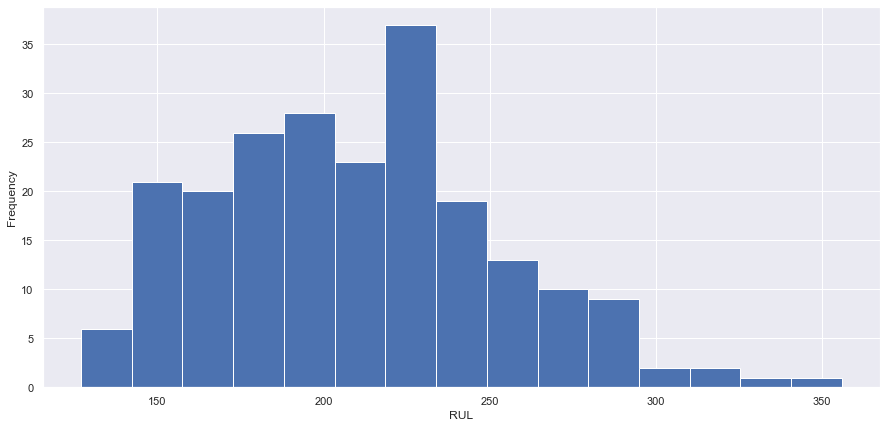

In [12]:
# Plotting the RUL 

hist = train[['ID', 'RUL']].groupby('ID').max().reset_index()
hist['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show

In [13]:
def plot_sensor_1(sensor_name):
    plt.figure(figsize=(20,5))
    for i in train['ID'].unique():
        if (i % 70 == 0):  # only plot every 70th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['ID']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

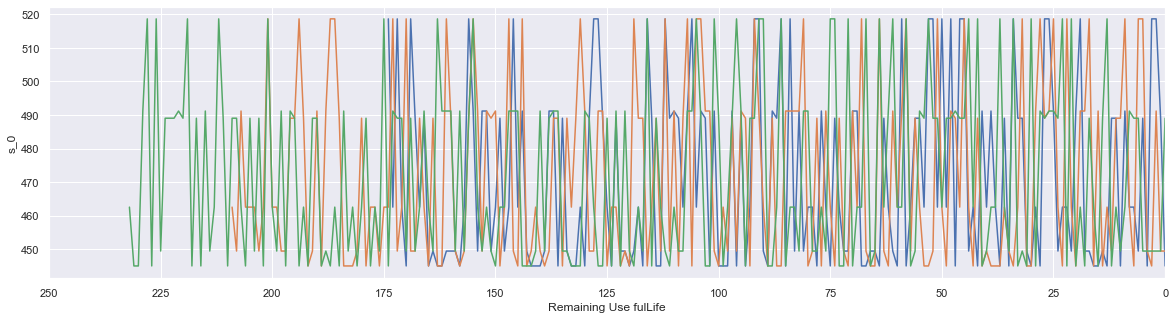

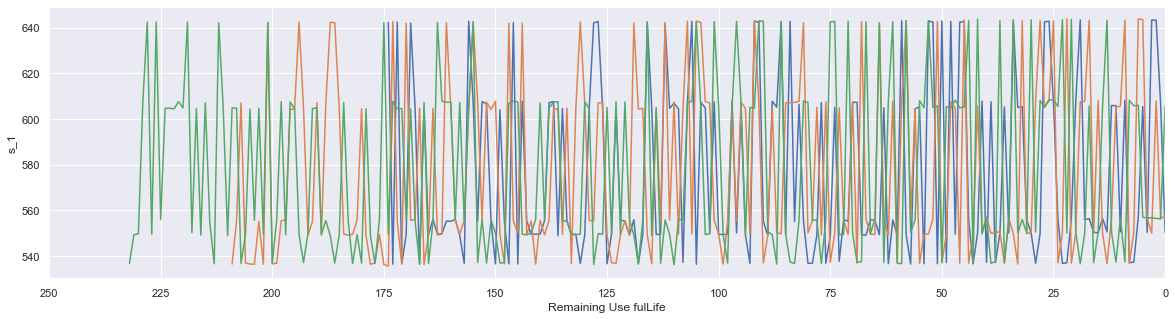

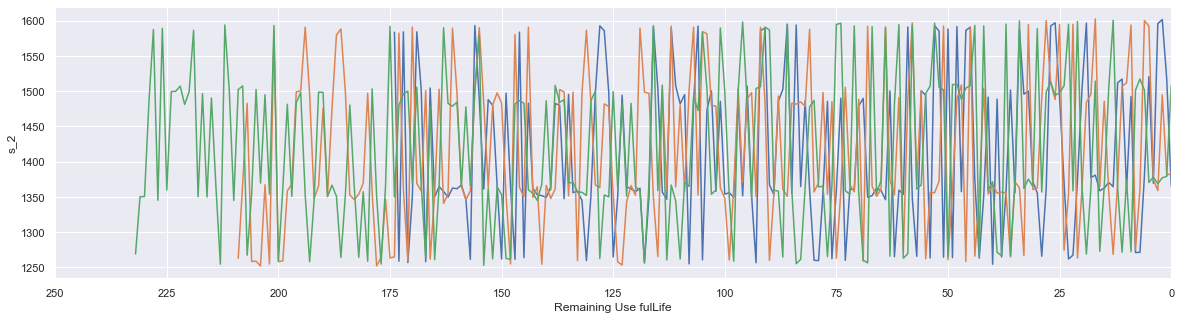

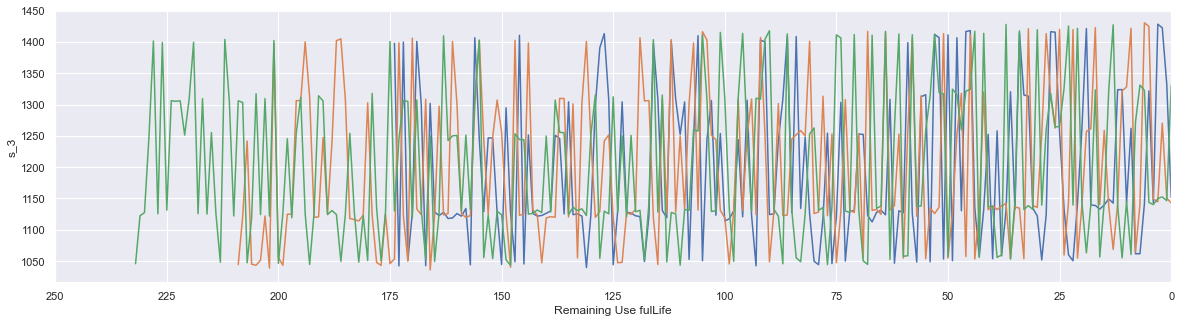

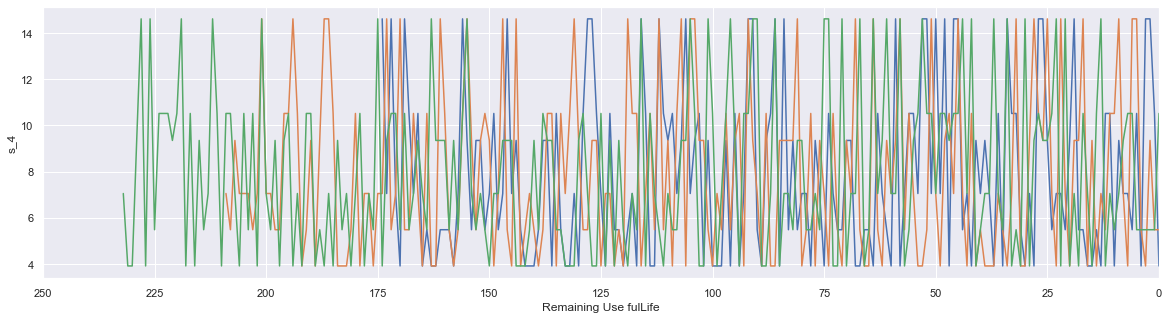

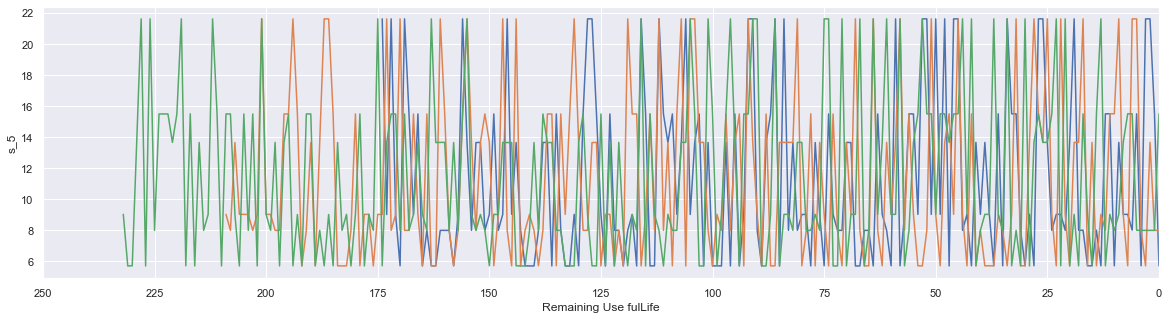

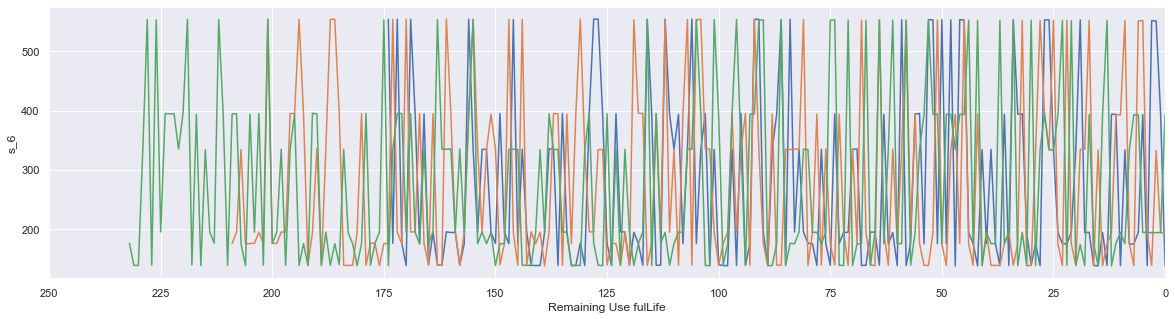

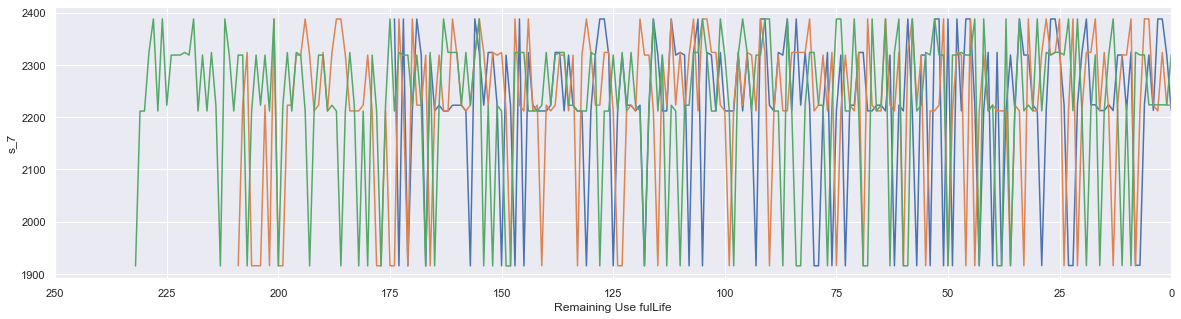

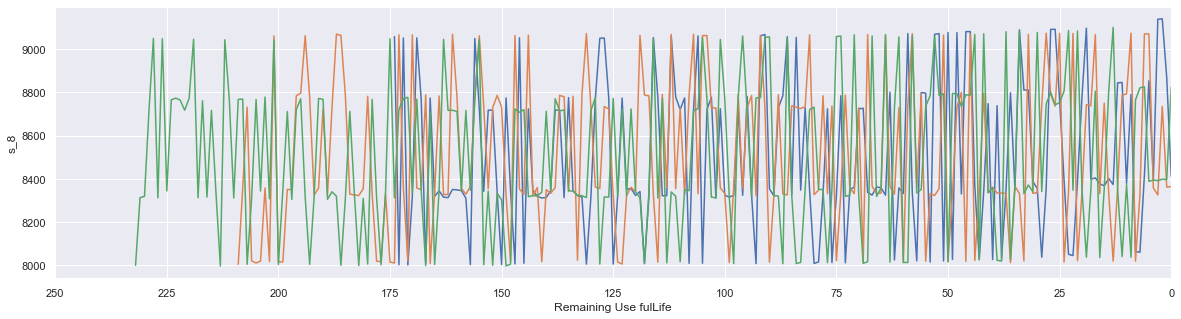

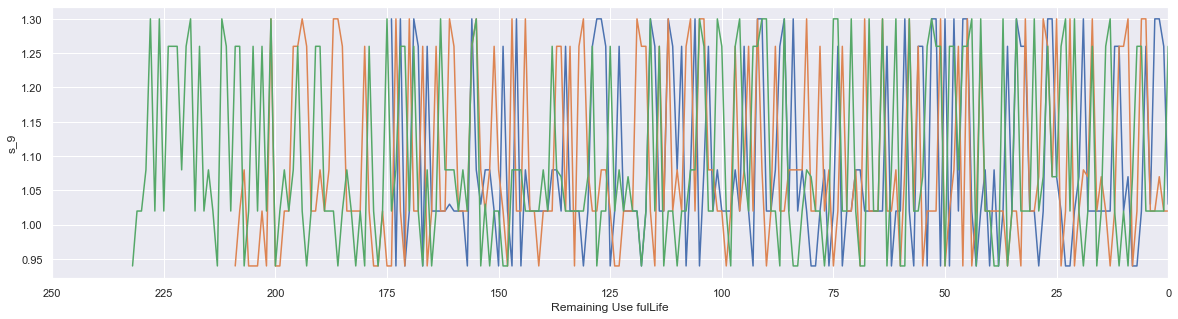

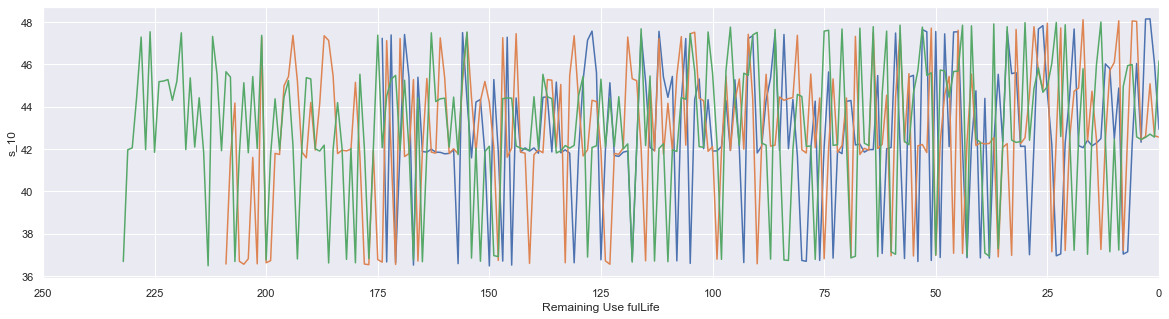

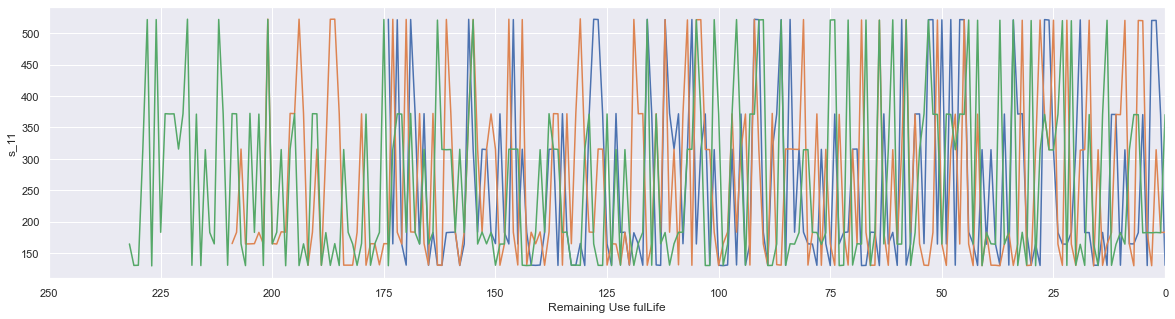

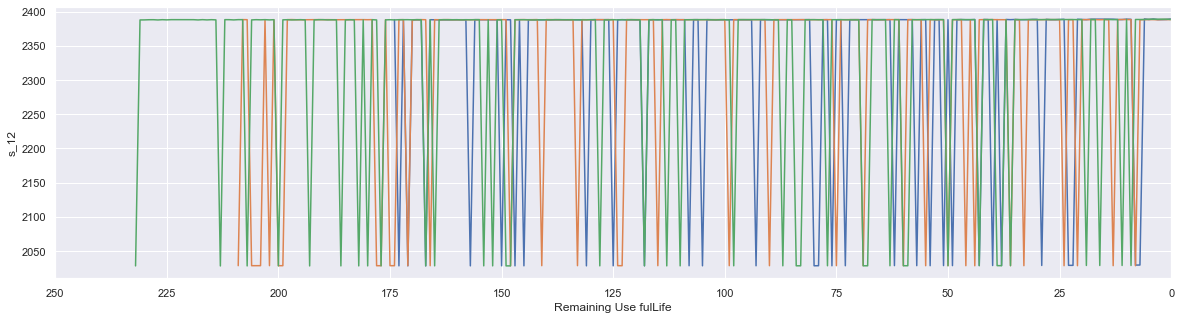

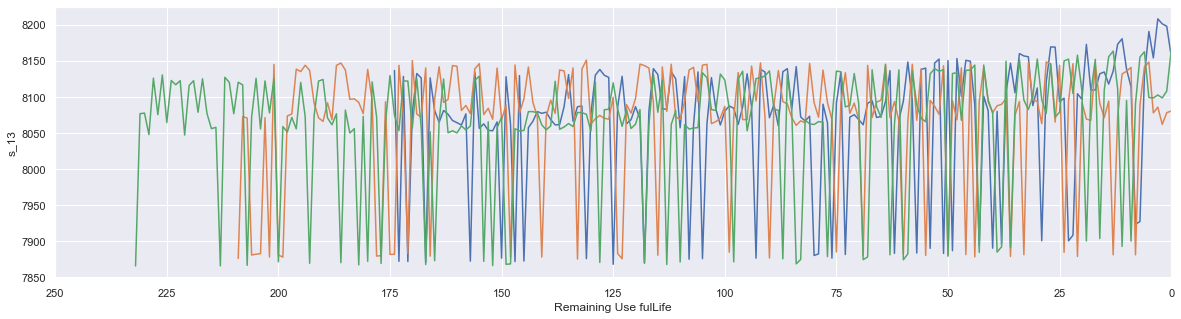

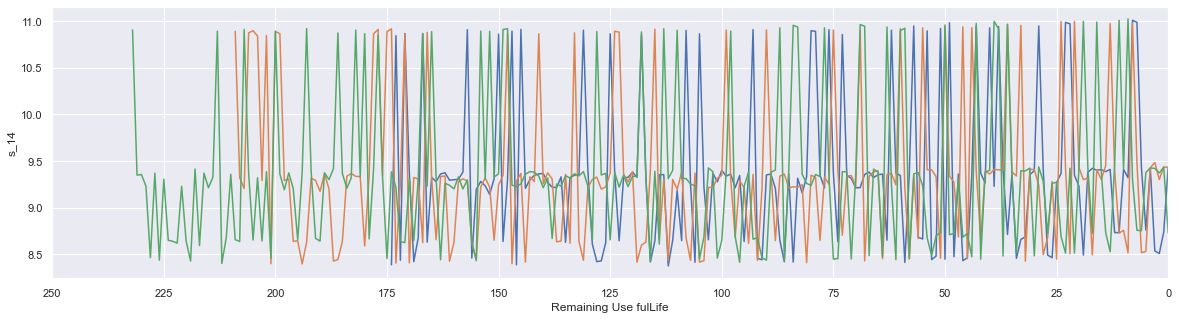

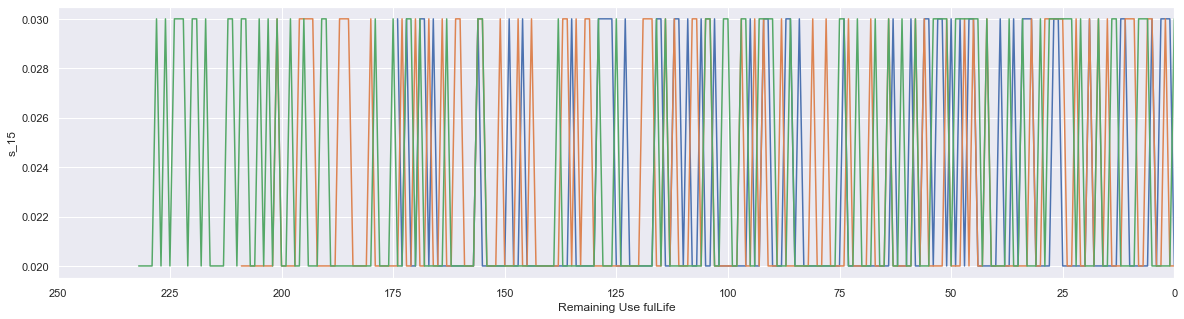

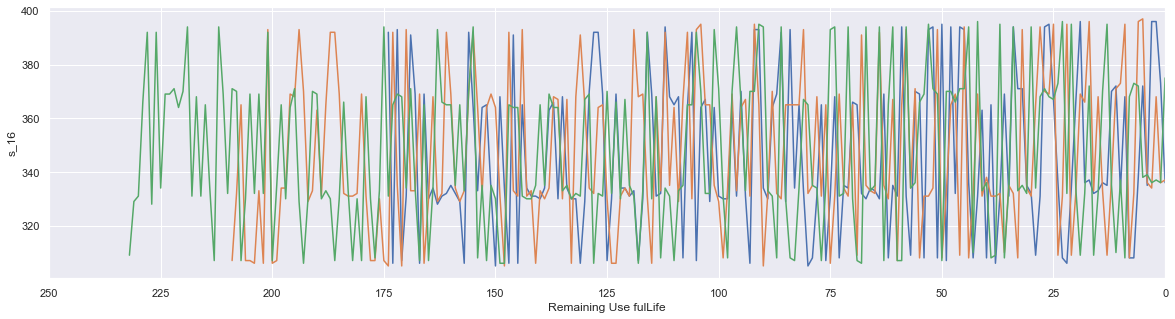

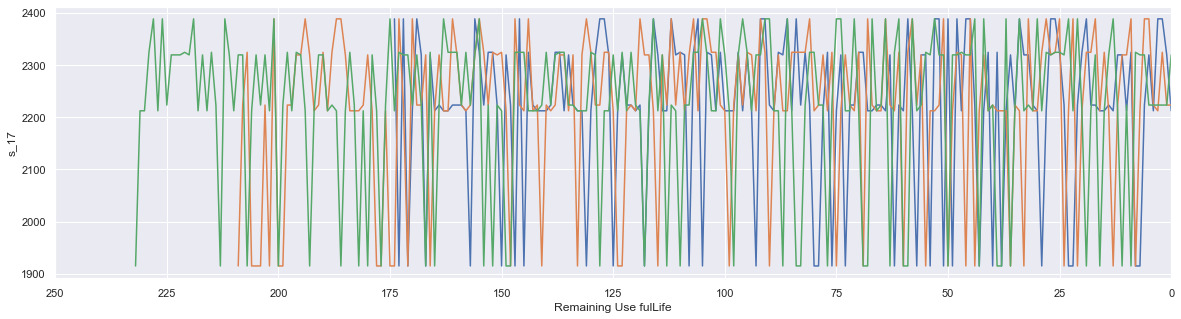

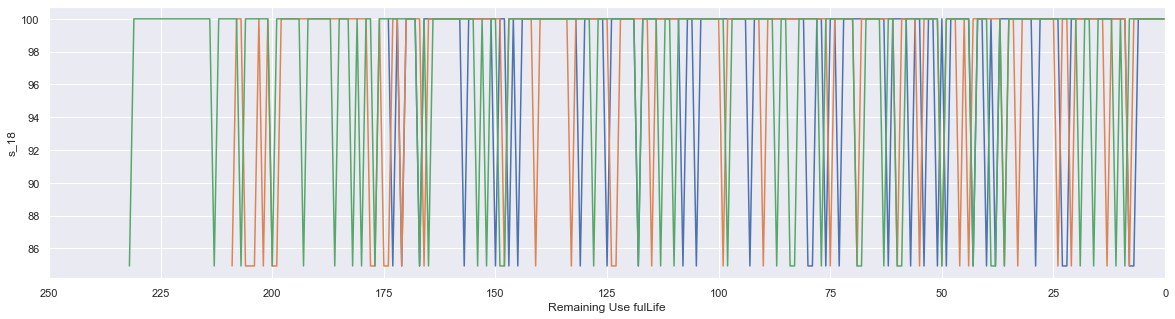

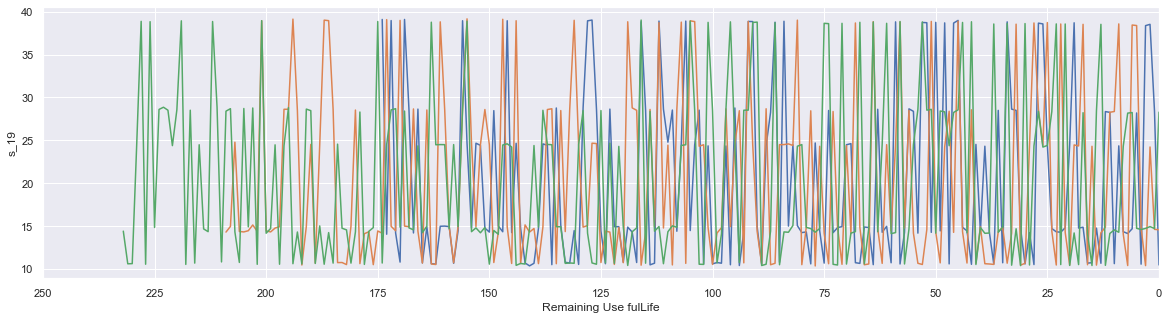

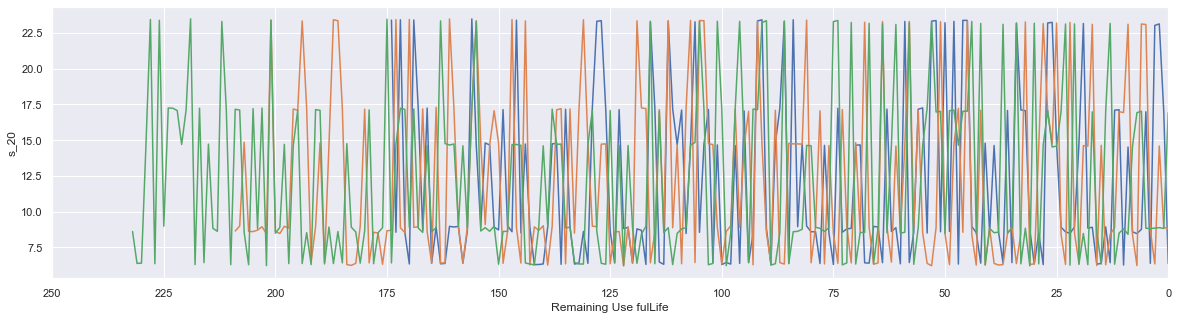

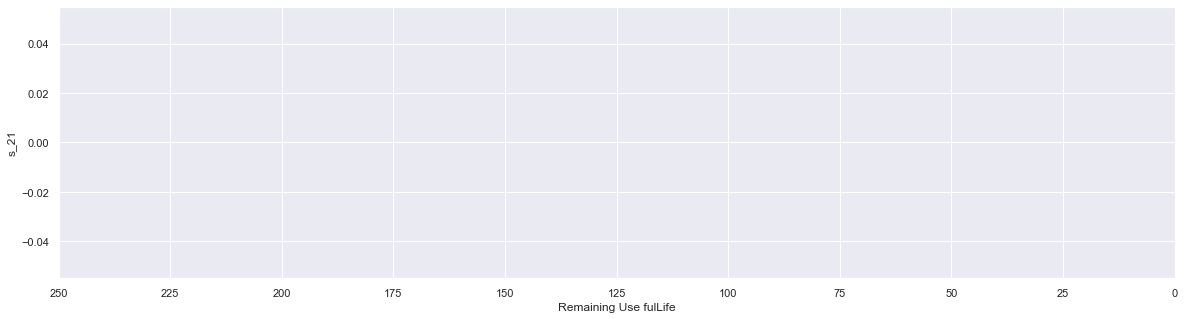

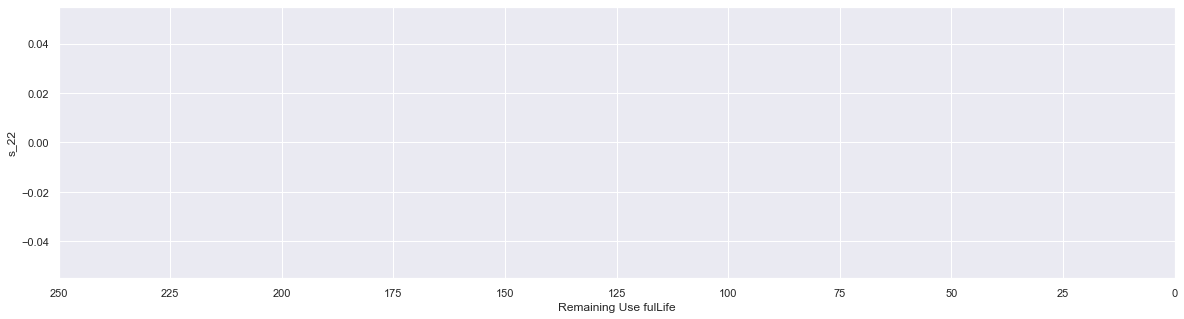

In [14]:
sensor_names_1 = train[sensor_names]
for sensor_name in sensor_names_1: 
    plot_sensor_1(sensor_name)

In [15]:
sensor_names_1

s_0     s_1      s_2      s_3    s_4    s_5     s_6      s_7  \
0      489.05  604.13  1499.45  1309.95  10.52  15.49  394.88  2318.87   
1      518.67  642.13  1584.55  1403.96  14.62  21.61  553.67  2388.01   
2      449.44  555.42  1368.17  1122.49   5.48   8.00  194.93  2222.86   
3      491.19  607.03  1488.44  1249.18   9.35  13.65  334.82  2323.85   
4      445.00  549.52  1354.48  1124.32   3.91   5.71  138.24  2211.80   
...       ...     ...      ...      ...    ...    ...     ...      ...   
45913  445.00  551.02  1365.27  1147.43   3.91   5.72  137.97  2211.33   
45914  445.00  550.07  1365.55  1142.21   3.91   5.71  137.56  2211.29   
45915  445.00  549.92  1359.21  1150.15   3.91   5.72  138.05  2211.24   
45916  449.44  556.55  1380.05  1145.49   5.48   8.00  194.59  2222.54   
45917  462.54  537.46  1274.65  1068.77   7.05   9.03  175.15  1914.86   

           s_8   s_9  ...     s_13     s_14  s_15  s_16  s_17    s_18   s_19  \
0      8770.20  1.26  ...  8120.83   8.6216  0.03   368  2319  100.00  28.58   
1      9045.76  1.30  ...  8132.87   8.3907  0.03   391  2388  100.00  38.99   
2      8343.91  1.02  ...  8063.84   9.3557  0.02   334  2223  100.00  14.83   
3      8721.53  1.08  ...  8052.30   9.2231  0.02   364  2324  100.00  24.42   
4      8314.56  1.02  ...  8083.67   9.2986  0.02   330  2212  100.00  10.99   
...        ...   ...  ...      ...      ...   ...   ...   ...     ...    ...   
45913  8303.20  1.02  ...  8062.87   9.4672  0.02   333  2212  100.00  10.57   
45914  8302.69  1.02  ...  8062.05   9.4619  0.02   332  2212  100.00  10.40   
45915  8309.41  1.02  ...  8062.73   9.4827  0.02   334  2212  100.00  10.37   
45916  8330.67  1.02  ...  8043.21   9.4212  0.02   337  2223  100.00  14.70   
45917  7991.49  0.94  ...  7859.24  10.9748  0.02   310  1915   84.93  14.19   

          s_20  s_21  s_22  
0      17.1735   NaN   NaN  
1      23.3619   NaN   NaN  
2       8.8555   NaN   NaN  
3      14.7832   NaN   NaN  
4       6.4025   NaN   NaN  
...        ...   ...   ...  
45913   6.2985   NaN   NaN  
45914   6.2741   NaN   NaN  
45915   6.1978   NaN   NaN  
45916   8.6761   NaN   NaN  
45917   8.5120   NaN   NaN  

[45918 rows x 23 columns]

## Conclusion of EDA

In [16]:
#Question to ask: 
# are we including the settings names?
# So what are we face off? 
# What else could I add in my EDA?

# 2. Returning to Data Cleaning after EDA

## Data preprocessing 

### X and Y variables

In [17]:
# Here is the possibility to drop some censors that we do nt want following the EDA
drop_sensors=['s_21', 's_22']
drop=["ID", 'Max_cycles', 'RUL']
drop_cycle = ['Cycle']
drop_OPS = ['']
drop_columns = drop_sensors + drop + drop_cycle 

# are we including the settings names?

X_train = train.drop(drop_columns, axis=1)
y_train = train['RUL']
X_train.shape

#Test 
X_test = test.drop(drop_columns, axis=1)
y_test = test['RUL']

X_test.shape

(29820, 24)

### Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

In [19]:
x_test_scaled = scaler.transform(X_test)

### Features engineering 

In [20]:
# Let's try so different technique 
# Here the author want us to apply polynomial transformation on our features, passing from 22 to 276 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(x_train_scaled)
X_train_transformed = poly.transform(x_train_scaled)

print(x_train_scaled.shape)
print(X_train_transformed.shape)

(45918, 24)
(45918, 325)


In [21]:
X_test_transformed =poly.transform(x_test_scaled)

print(x_test_scaled.shape)
print(X_test_transformed.shape)

(29820, 24)
(29820, 325)


In [22]:
# No ID 
X_train_transformed_pd = pd.DataFrame(X_train_transformed)

X_test_transformed_pd = pd.DataFrame(X_test_transformed)
# Merge with ID 
train_to_stationnary = pd.concat([X_train_transformed_pd, train['ID']], axis=1)
train_to_stationnary

test_to_stationnary = pd.concat([X_test_transformed_pd, test['ID']], axis=1)
test_to_stationnary

0         1         2    3         4         5         6         7  \
0      1.0  0.000038  0.000238  1.0  1.000000  0.985751  0.925656  0.927532   
1      1.0  0.595108  0.738124  0.8  0.238089  0.007354  0.046611  0.062853   
2      1.0  0.000010  0.000000  1.0  1.000000  0.983637  0.932535  0.920508   
3      1.0  0.238131  0.296912  0.2  0.597937  0.632377  0.689272  0.692349   
4      1.0  0.000057  0.001306  1.0  1.000000  0.984464  0.920944  0.917068   
...    ...       ...       ...  ...       ...       ...       ...       ...   
29815  1.0  0.833206  0.998100  0.6  0.060269  0.188362  0.331419  0.242425   
29816  1.0  0.595222  0.736342  0.8  0.238089  0.012135  0.047396  0.054109   
29817  1.0  0.476202  0.831354  0.0  0.626985  0.664460  0.668201  0.541333   
29818  1.0  0.476188  0.831354  0.0  0.626985  0.663725  0.664545  0.545474   
29819  1.0  0.476069  0.832423  0.0  0.626985  0.662806  0.650543  0.548623   

              8         9  ...       316       317       318  319       320  \
0      1.000000  1.000000  ...  1.000000  0.987629  0.983532  1.0  0.987629   
1      0.293184  0.208176  ...  0.000000  0.000000  0.000000  0.0  0.000000   
2      1.000000  1.000000  ...  1.000000  0.985567  0.981608  1.0  0.985567   
3      0.617180  0.615094  ...  0.854123  0.539183  0.536344  1.0  0.631271   
4      1.000000  1.000000  ...  1.000000  0.982474  0.984076  1.0  0.982474   
...         ...       ...  ...       ...       ...       ...  ...       ...   
29815  0.146592  0.144025  ...  0.651163  0.098234  0.101385  1.0  0.150859   
29816  0.293184  0.208805  ...  0.000000  0.000000  0.000000  0.0  0.000000   
29817  0.507937  0.500000  ...  0.864693  0.421649  0.415802  1.0  0.487629   
29818  0.507937  0.500000  ...  0.864693  0.422541  0.418030  1.0  0.488660   
29819  0.507937  0.500000  ...  0.864693  0.427295  0.424392  1.0  0.494158   

            321       322       323       324   ID  
0      0.983532  0.975411  0.971364  0.967335    1  
1      0.000000  0.019466  0.020308  0.021187    1  
2      0.981608  0.971342  0.967440  0.963554    1  
3      0.627947  0.398504  0.396405  0.394317    1  
4      0.984076  0.965256  0.966829  0.968405    1  
...         ...       ...       ...       ...  ...  
29815  0.155698  0.022758  0.023489  0.024242  218  
29816  0.000000  0.020633  0.019492  0.018414  218  
29817  0.480866  0.237782  0.234484  0.231232  218  
29818  0.483443  0.238788  0.236239  0.233717  218  
29819  0.490801  0.244192  0.242533  0.240886  218  

[29820 rows x 326 columns]

### Feature selection

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 

In [24]:
# function to calculate R2 and MSE 

def performance_metrics(y_true, y_hat, label='test'): 
    mse = mean_squared_error(y_train, y_hat)
    r2= np.sqrt(mse)
    variance = r2_score(y_train, y_hat)
    print('The MSE {}, The RMSE is {}, the R-square is {}'.format(mse, r2, variance))

In [25]:
# With train_test_split 
LR = LinearRegression()

LR.fit(X_train_transformed_pd, y_train)

y_pred_train = LR.predict(X_train_transformed_pd)

# y_pred = LR.predict(pd_xtrain_transformed)

performance_metrics(y_train, y_pred_train, label='Train')

# performance_metrics(y_test, y_pred, label='Test')

The MSE 1724.0821435758423, The RMSE is 41.5220681514763, the R-square is 0.6317062441313905


In [26]:
from sklearn.feature_selection import SelectFromModel

# Feature engineering + selection

select_features = SelectFromModel(LR, threshold='mean', prefit=True)
select_features.get_support()
feature_names = poly.get_feature_names()

print('Original features:\n', X_train.columns)
print('Best features:\n', pd.DataFrame(feature_names)[select_features.get_support()])
pd.DataFrame(feature_names)[select_features.get_support()].shape

Original features:
 Index(['OptSet1', 'OptSet2', 'OptSet3', 's_0', 's_1', 's_2', 's_3', 's_4',
       's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20'],
      dtype='object')
Best features:
            0
1         x0
2         x1
11       x10
16       x15
28     x0 x3
32     x0 x7
45    x0 x20
46    x0 x21
51     x1 x3
55     x1 x7
68    x1 x20
69    x1 x21
73     x2 x3
77     x2 x7
90    x2 x20
94      x3^2
98     x3 x7
99     x3 x8
101   x3 x10
105   x3 x14
106   x3 x15
111   x3 x20
114   x3 x23
172     x7^2
183   x7 x18
185   x7 x20
201   x8 x20
202   x8 x21
230  x10 x20
231  x10 x21
247    x12^2
255  x12 x20
276  x14 x20
277  x14 x21
285  x15 x20
286  x15 x21
306  x18 x20
315    x20^2
318  x20 x23
321  x21 x23


/Users/philippebeliveau/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(40, 1)

### Remaining Sensors 

In [27]:
remaining_sensors = pd.DataFrame(feature_names)[select_features.get_support()]
remaining_sensors = remaining_sensors.index
remaining_sensors.shape

(40,)

In [28]:
# TRAIN 
# Data to transform into sationarity 
train_filter = train_to_stationnary[remaining_sensors]
train_sensors = pd.concat([train_filter, train['ID']], axis=1)

# TEST 
test_filter = test_to_stationnary[remaining_sensors]
test_sensors = pd.concat([test_filter, test['ID']], axis=1)

## Time Series data preparation

### Stationnarity 

In [29]:
# This function transform all of of sensors and 

from statsmodels.tsa.stattools import adfuller

def find_max_diff(series):
    maxdiff = 0
    do = True
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series, maxlag=1)
    if pvalue < 0.05:
        do = False
    
    while do:
        maxdiff += 1
        adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series.diff(maxdiff).dropna(), maxlag=1)
        if pvalue < 0.05:  # if significant, stop differencing and testing for stationarity
            do = False
    return maxdiff


def make_stationary(df_input, columns):
    df = df_input.copy()
    for unit_nr in range(1, df['ID'].max()+1):
        for col in columns:
            maxdiff = find_max_diff(df.loc[df['ID']==unit_nr, col])
            if maxdiff > 0:
                df.loc[df['ID']==unit_nr, col] = df.loc[df['ID']==unit_nr, col].diff(maxdiff)
    df.dropna(inplace=True)
    return df

#### Train

In [30]:
# make all remaining sensors stationary per ID
intermediate_train = train_sensors
intermediate_train = make_stationary(intermediate_train, remaining_sensors)

intermediate_train.head()  # stationary data!
intermediate_train.shape

(45918, 41)

#### Test 

In [31]:
# make all remaining sensors stationary per ID
intermediate_test = test_sensors
intermediate_test = make_stationary(intermediate_test, remaining_sensors)

intermediate_test.head()  # stationary data!
intermediate_test.shape

(29814, 41)

### Searching for number of lags

In [32]:
# https://towardsdatascience.com/time-series-analysis-for-predictive-maintenance-of-turbofan-engines-1b3864991da4
# # add lags and evaluate models to find optimal lag length
# import statsmodels.api as sm

# metrics = pd.DataFrame(columns=['rmse', 'AIC', 'BIC'])
# nr_of_lags = 30
# for i in range(0, nr_of_lags+1):
#     X_train = add_lagged_variables(intermediate_df, i, remaining_sensors)
#     X_train = X_train.drop(index_names, axis=1)
#     y_train = X_train.pop('RUL')
    
#     model = sm.OLS(y_train, sm.add_constant(X_train.values))
#     result = model.fit()

#     metrics = metrics.append(pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic,2), round(result.bic,2)]],
#                                columns=['rmse', 'AIC', 'BIC']),
#                                ignore_index = True)

# display(metrics)

In [33]:
# plt.figure(figsize=(15,5))
# plt.plot(metrics['AIC'].diff(), marker='.')  # plot the difference to see where it flattens out
# plt.plot(14, metrics['AIC'].diff()[14], '.r')
# plt.xlabel("Nr of lags")
# plt.ylabel("AIC rate of change")
# plt.show()
# plt.close()

### Multicolinearity 

In [34]:
# def add_lagged_variables(df_input, nr_of_lags, columns):
#     df = df_input.copy()
#     for i in range(nr_of_lags):
#         lagged_columns = [col + '_lag_{}'.format(i+1) for col in columns]
#         df[lagged_columns] = df.groupby('ID')[columns].shift(i+1)
#     df.dropna(inplace=True)
#     return df

In [35]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
# X_train = X_train.drop(index_names, axis=1)

# # note, this takes a few minutes to calculate
# vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}
# display(vifs)

In [36]:
# from sklearn.preprocessing import StandardScaler

# intermediate_df = train.drop(drop_labels, axis=1)
# scaler = StandardScaler()
# scaler.fit(intermediate_df[remaining_sensors])
# intermediate_df[remaining_sensors] = scaler.transform(intermediate_df[remaining_sensors])

# intermediate_df = make_stationary(intermediate_df, remaining_sensors)

# X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
# X_train = X_train.drop(index_names, axis=1)

# vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}
# display(vifs)

## Prepare data for sktime 

### Train

In [37]:
## !! Here I might have to 

Sktime_format_train = intermediate_train.to_csv('/Users/philippebeliveau/Library/Mobile Documents/com~apple~CloudDocs/I2A2/Challenge Engine Airplane/Sktime_format_train.csv')

In [38]:
from sktime.datatypes._panel._convert import (
    from_2d_array_to_nested,
    from_nested_to_2d_array,
    is_nested_dataframe,
)
df_train = pd.read_csv('/Users/philippebeliveau/Library/Mobile Documents/com~apple~CloudDocs/I2A2/Challenge Engine Airplane/Sktime_format_train.csv')
nested_train  = from_2d_array_to_nested(df_train)

## Test

In [39]:
## !! Here I might have to 

Sktime_format_test = intermediate_test.to_csv('/Users/philippebeliveau/Library/Mobile Documents/com~apple~CloudDocs/I2A2/Challenge Engine Airplane/Sktime_format_test.csv')

In [40]:
from sktime.datatypes._panel._convert import (
    from_2d_array_to_nested,
    from_nested_to_2d_array,
    is_nested_dataframe,
)
df_test = pd.read_csv('/Users/philippebeliveau/Library/Mobile Documents/com~apple~CloudDocs/I2A2/Challenge Engine Airplane/Sktime_format_test.csv')
nested_test  = from_2d_array_to_nested(df_test)